In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib qt

In [2]:
def calc_sizes(img, ratio_x, ratio_y):
    size = img.shape
    n_size = ((img.shape[0] - 1) * ratio_y + 1, (img.shape[1] - 1) * ratio_x + 1)
    return size, n_size


def nearest_zoom(img, ratio_x, ratio_y):
    size, n_size = img.shape, (int(img.shape[0]*ratio_y), int(img.shape[1]*ratio_x))
    n_img = np.zeros(n_size)

    for i in range(n_size[0]):
        for j in range(n_size[1]):
            n_img[i][j] = img[int(i / ratio_y)][int(j / ratio_x)]
    return n_img


def bilinear_zoom(img, ratio_x, ratio_y):
    size, n_size = calc_sizes(img, ratio_x, ratio_y)
    b_img = np.zeros(n_size)
    temp = np.zeros((size[0], n_size[1]))

    for i in range(size[0]):
        for j in range(n_size[1]):
            temp[i][j] = (int(img[i][math.floor(j / ratio_x)]) + int(img[i][math.ceil(j / ratio_x)])) / 2

    for i in range(n_size[0]):
        for j in range(n_size[1]):
            b_img[i][j] = (int(temp[math.floor(i / ratio_y)][j]) + int(temp[math.ceil(i / ratio_y)][j])) / 2
    return b_img


def k_zoom(img, ratio_x, ratio_y):
    size, n_size = calc_sizes(img, ratio_x, ratio_y)
    k_img = np.zeros(n_size)
    temp = np.zeros((size[0], n_size[1]))

    for i in range(size[0]):
        count = 0
        op = 0
        for j in range(n_size[1]):
            if count == 0:
                temp[i][j] = img[i][int(j / ratio_x)]
                if j < n_size[1] - 1:
                    op = (int(img[i][int(j / ratio_x) + 1]) - int(img[i][int(j / ratio_x)])) / ratio_x
            else:
                temp[i][j] = int(temp[i][j - 1] + op)
            count = (count + 1) % ratio_x

    for j in range(n_size[1]):
        count = 0
        op = 0
        for i in range(n_size[0]):
            if count == 0:
                k_img[i][j] = temp[int(i/ratio_y)][j]
                if i < n_size[0] -1:
                    op = (temp[int(i/ratio_y)+1][j] - temp[int(i/ratio_y)][j])/ratio_y
            else:
                k_img[i][j] = int(k_img[i-1][j] + op)
            count = (count+1)%ratio_y

    # k_img = temp
    return k_img


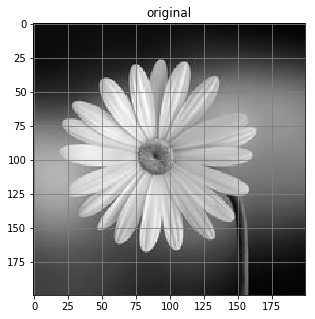

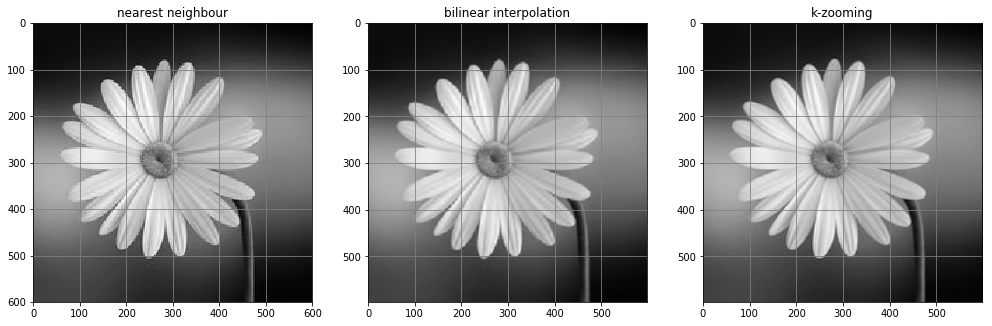

In [3]:

path = "images/daisy.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# img = np.array([[69,50,80],[45,60,66],[30,55,80]])
# img = np.array([[15,30,15],[30,15,30]])
# img = np.arange(100).reshape((10,10))
# print(img)
plt.figure(1,figsize=(5,5))
# plt.subplot(321)
plt.title("original")
plt.grid(True, color="gray")
plt.imshow(img, cmap="gray")
#
ratio_y, ratio_x = 3,3
#
n_img = nearest_zoom(img, ratio_x, ratio_y)
# print(n_img)
plt.figure(2,figsize=(17,10))
plt.subplot(131)
plt.title("nearest neighbour")
plt.grid(True, color="gray", )
plt.imshow(n_img, cmap="gray")
#
b_img = bilinear_zoom(img, ratio_x, ratio_y)
# print(b_img)
plt.subplot(132)
plt.title("bilinear interpolation")
plt.grid(True, color="gray")
plt.imshow(b_img, cmap="gray")

k_img = k_zoom(img, ratio_x, ratio_y)
# print(k_img)
plt.subplot(133)
plt.title("k-zooming")
plt.grid(True, color="gray")
plt.imshow(k_img, cmap="gray")

plt.show()

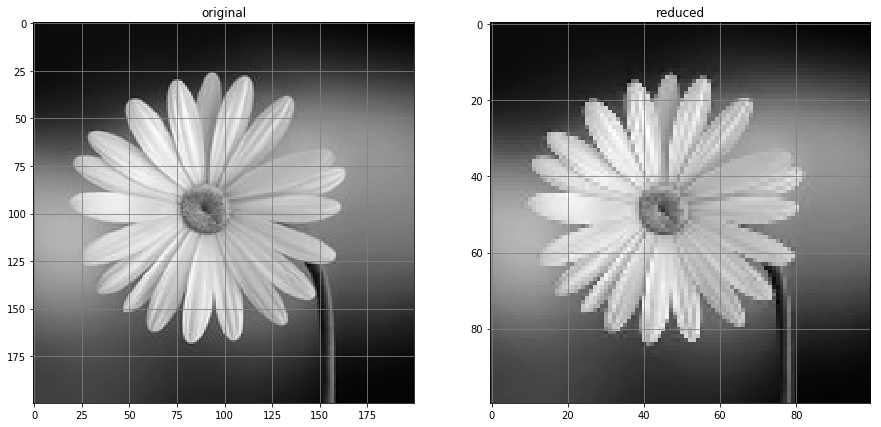

In [7]:
img2 = np.arange(400).reshape((20,20))

plt.figure(3,figsize=(15,10))
plt.subplot(121)
plt.title("original")
plt.grid(True, color="gray")
plt.imshow(img, cmap="gray")

r_img = nearest_zoom(img,1/2,1/2)
# print(r_img)
plt.subplot(122)
plt.title("reduced")
plt.grid(True, color="gray")
plt.imshow(r_img, cmap="gray")
plt.show()